In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

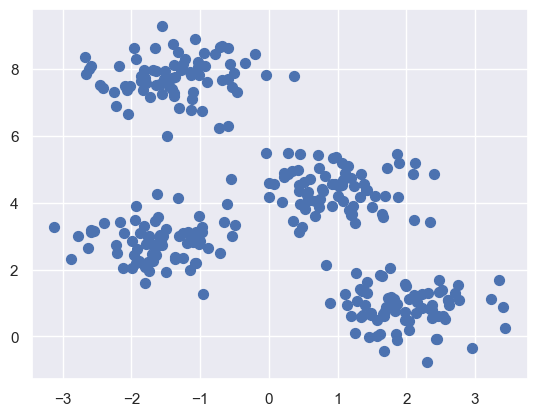

In [2]:
from sklearn.datasets._samples_generator import make_blobs
x,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(x[:,0],x[:,1],s=50)

In [3]:
kmeans=KMeans(4)
kmeans.fit(x)
y_kmeans=kmeans.fit_predict(x)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(x,n_clusters,rseed=2):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(x.shape[0])[:n_clusters]
    centers=x[i]
    
    while True:
        labels=pairwise_distances_argmin(x,centers)
        new_centers=np.array([x[labels==i].mean(0)
                             for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
            centers=new_centers
            
            
            return centers,labels
        
centers,labels=find_clusters(x,4)
plt.scatter(x[:,0],x[:,1],c=y_kmeans,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5);

### using kmeans for color compression

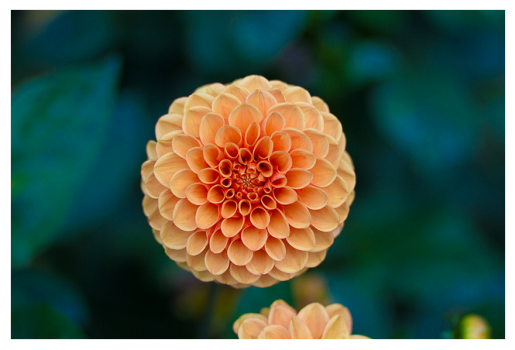

In [6]:
from sklearn.datasets import load_sample_image
china=load_sample_image('flower.jpg')
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china);

In [7]:
china.shape

(427, 640, 3)

In [11]:
## rehape the data and rescale the colors so that they lie between 0 and 1
data=china/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [13]:
## visualize these pixels in this color space,using a subset of 10,000 pixels for efficiency
def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
    
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T
    
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B, color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=20)

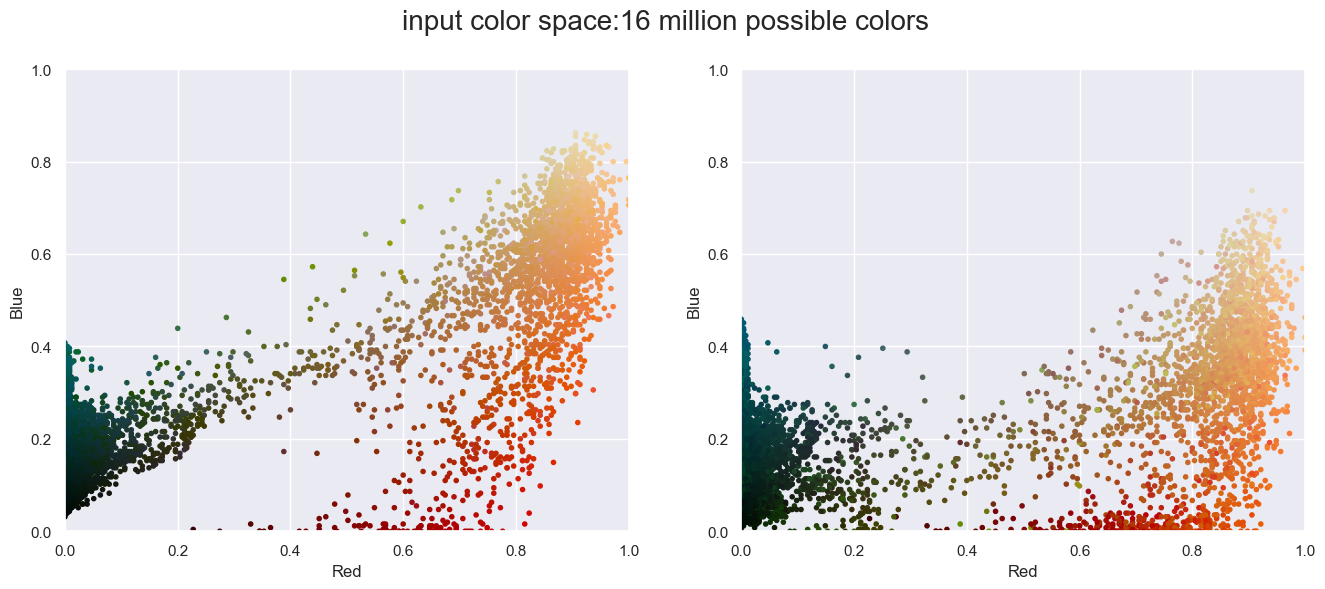

In [14]:
plot_pixels(data,title='input color space:16 million possible colors')

In [16]:
import warnings
warnings.simplefilter('ignore')

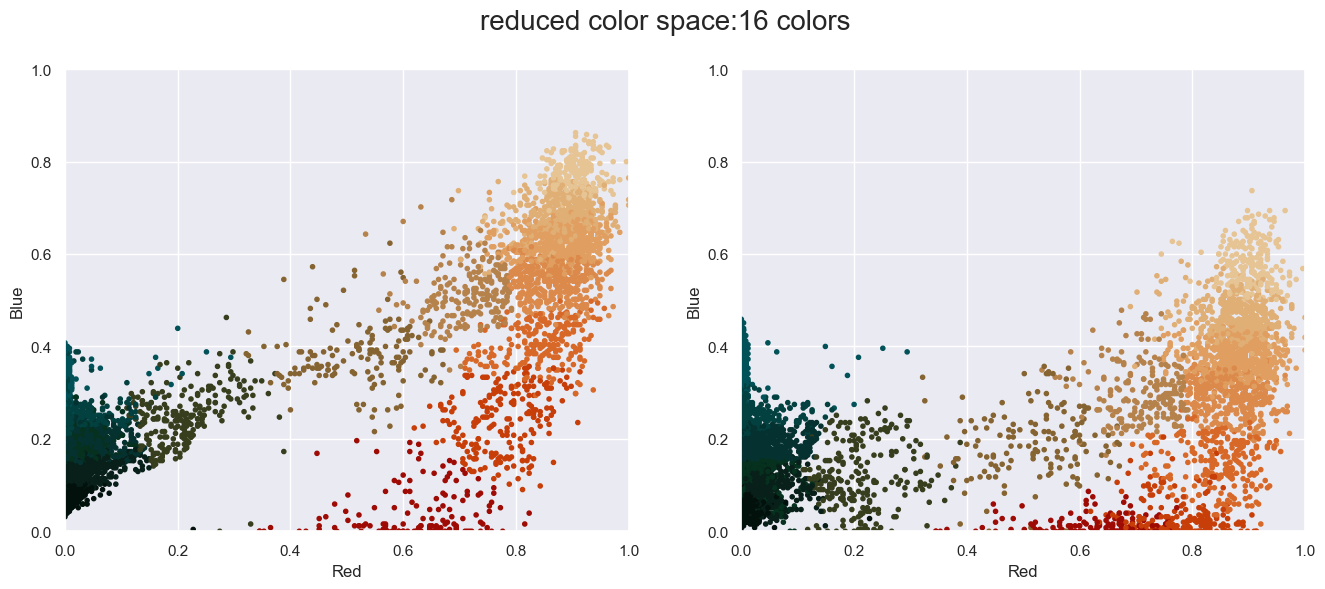

In [17]:
## reduccing these 16 million colors to just 16 colors
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors=new_colors,title='reduced color space:16 colors')

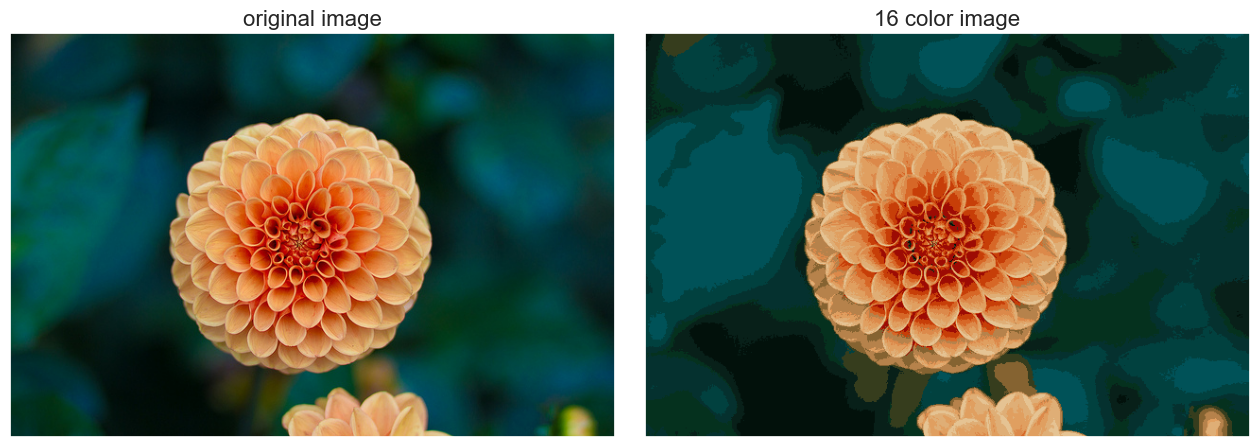

In [18]:
china_recolored=new_colors.reshape(china.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('original image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16 color image',size=16);

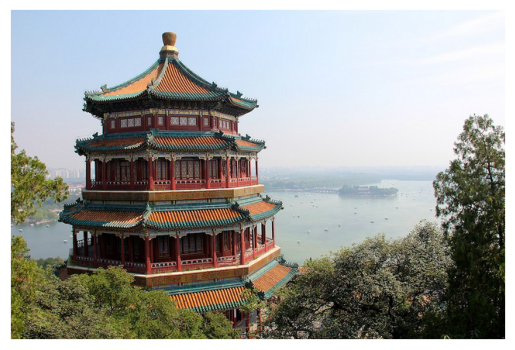

In [20]:
china=load_sample_image('china.jpg')
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china);

In [21]:
## rehape the data and rescale the colors so that they lie between 0 and 1
data=china/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [22]:
## visualize these pixels in this color space,using a subset of 10,000 pixels for efficiency
def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
    
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T
    
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B, color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=20)

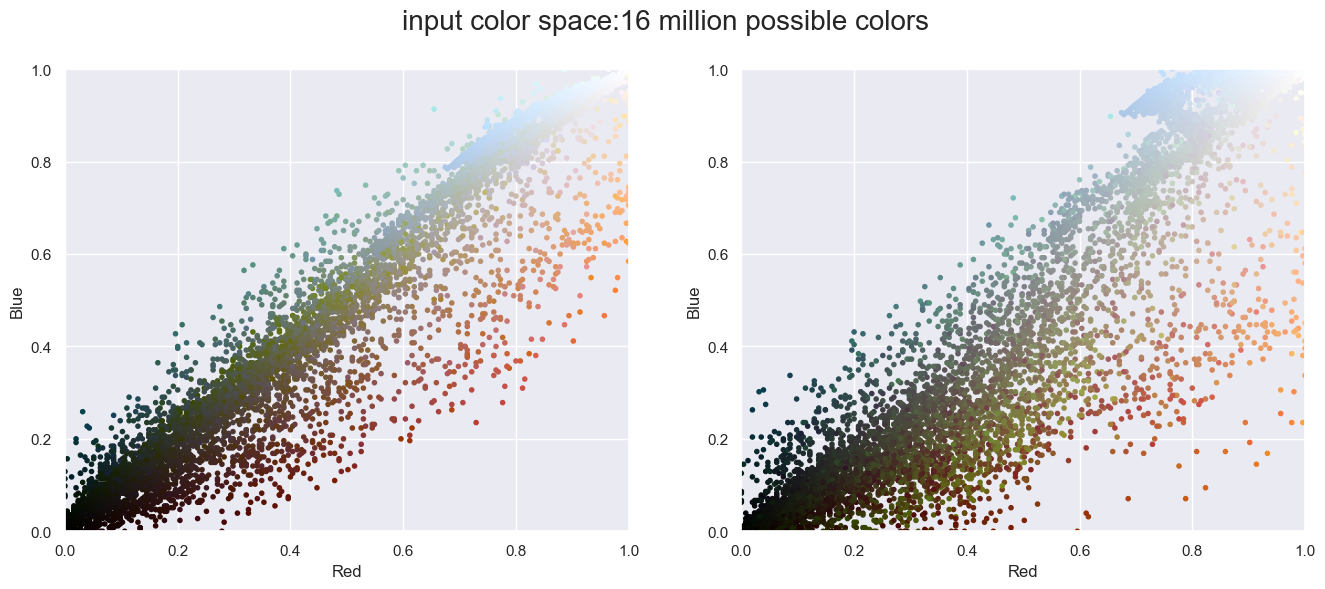

In [23]:
plot_pixels(data,title='input color space:16 million possible colors')

In [24]:
import warnings
warnings.simplefilter('ignore')

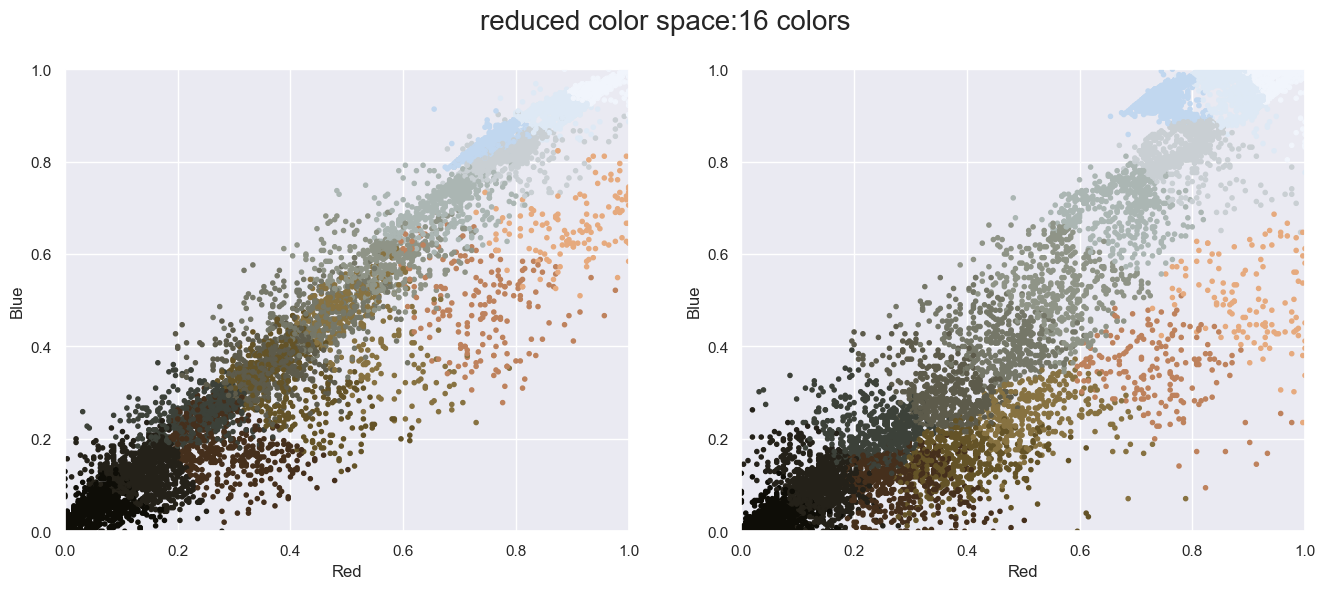

In [25]:
## reduccing these 16 million colors to just 16 colors
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors=new_colors,title='reduced color space:16 colors')

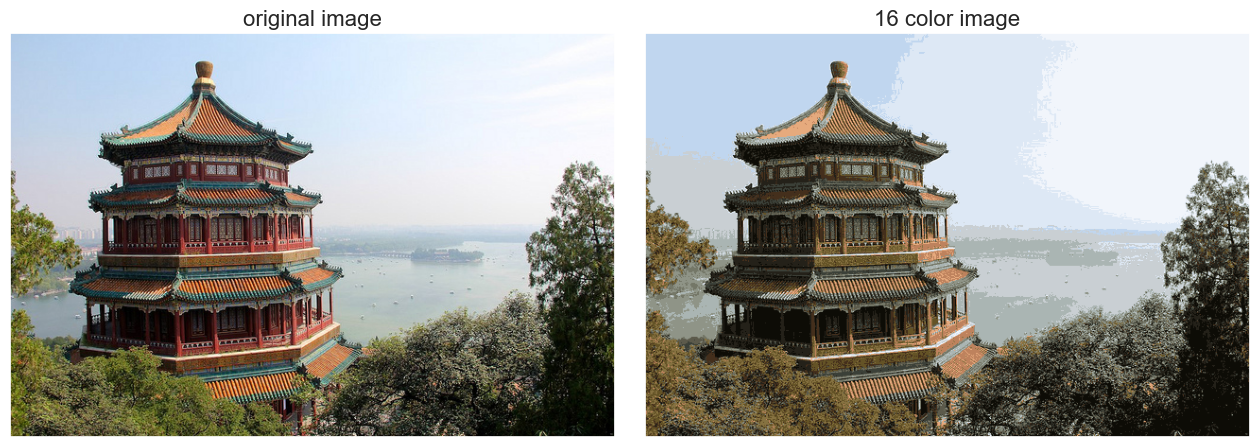

In [26]:
china_recolored=new_colors.reshape(china.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('original image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16 color image',size=16);